In [23]:
import pandas as pd
import numpy as np

In [24]:
data=pd.read_csv("Food-Truck-LineReg.csv")
print(data.head(5))

   xlabel   ylabel
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


<AxesSubplot:xlabel='xlabel'>

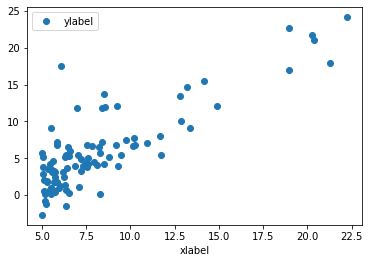

In [25]:
import matplotlib.pyplot as plt
data.plot(x="xlabel",y="ylabel",style="o")

In [26]:
xmean=data["xlabel"].mean()
ymean=data["ylabel"].mean()

In [27]:
data["x"]=data["xlabel"]-xmean
data["y"]=data["ylabel"]-xmean
data["x*y"]=data["x"]*data["y"]
data["x^2"]=data["x"]**2
data["y^2"]=data["y"]**2


In [28]:
print(data)

     xlabel    ylabel       x        y        x*y        x^2        y^2
0    6.1101  17.59200 -2.0497  9.43220 -19.333180   4.201270  88.966397
1    5.5277   9.13020 -2.6321  0.97040  -2.554190   6.927950   0.941676
2    8.5186  13.66200  0.3588  5.50220   1.974189   0.128737  30.274205
3    7.0032  11.85400 -1.1566  3.69420  -4.272712   1.337724  13.647114
4    5.8598   6.82330 -2.3000 -1.33650   3.073950   5.290000   1.786232
..      ...       ...     ...      ...        ...        ...        ...
92   5.8707   7.20290 -2.2891 -0.95690   2.190440   5.239979   0.915658
93   5.3054   1.98690 -2.8544 -6.17290  17.619926   8.147599  38.104694
94   8.2934   0.14454  0.1336 -8.01526  -1.070839   0.017849  64.244393
95  13.3940   9.05510  5.2342  0.89530   4.686179  27.396850   0.801562
96   5.4369   0.61705 -2.7229 -7.54275  20.538154   7.414184  56.893078

[97 rows x 7 columns]


In [29]:
sum_xy=data["x*y"].sum()
sum_x2=data["x^2"].sum()
sum_y2=data["y^2"].sum()

In [30]:
correlation=sum_xy/(sum_x2*sum_y2)**0.5

In [31]:
std_y=np.std(data["y"])
std_x=np.std(data["x"])

In [32]:
m=correlation*(std_y/std_x)

In [33]:
m

1.098640742139576

In [34]:
c=data["ylabel"].mean()-m*data["xlabel"].mean()
c

-3.1255536761641247

In [38]:
data["ypred"]=m*data["xlabel"]+c
print(data)

     xlabel    ylabel       x        y        x*y        x^2        y^2  \
0    6.1101  17.59200 -2.0497  9.43220 -19.333180   4.201270  88.966397   
1    5.5277   9.13020 -2.6321  0.97040  -2.554190   6.927950   0.941676   
2    8.5186  13.66200  0.3588  5.50220   1.974189   0.128737  30.274205   
3    7.0032  11.85400 -1.1566  3.69420  -4.272712   1.337724  13.647114   
4    5.8598   6.82330 -2.3000 -1.33650   3.073950   5.290000   1.786232   
..      ...       ...     ...      ...        ...        ...        ...   
92   5.8707   7.20290 -2.2891 -0.95690   2.190440   5.239979   0.915658   
93   5.3054   1.98690 -2.8544 -6.17290  17.619926   8.147599  38.104694   
94   8.2934   0.14454  0.1336 -8.01526  -1.070839   0.017849  64.244393   
95  13.3940   9.05510  5.2342  0.89530   4.686179  27.396850   0.801562   
96   5.4369   0.61705 -2.7229 -7.54275  20.538154   7.414184  56.893078   

        ypred  
0    3.587251  
1    2.947403  
2    6.233327  
3    4.568447  
4    3.312261  
.. 

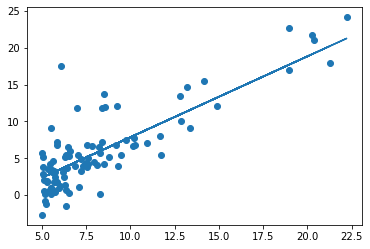

In [41]:
plt.scatter(data["xlabel"],data["ylabel"])
plt.plot(data["xlabel"],data["ypred"])

In [42]:
ssr=sum((data["ypred"]-data["ylabel"].mean())**2)

In [49]:
sse=sum((data["ylabel"]-data["ypred"])**2)
sse

881.3423457254235

In [48]:
sst=ssr+sse
sst

2616.6577513263837

In [47]:
cost=sse/96
cost

9.180649434639827

In [46]:
correlation**2

0.5953366934345163